In [1]:
# The R-package `renv` was used to create an R virtual environment.
# To install `renv`, do `install.packages('renv')`.
# To initialize an R environment, `renv::init()`.
# This will create a directory called `renv` in the current dir.

# See also:
# renv::init()
# renv::activate()
# renv::settings$snapshot.type('all')
# renv::status()
# renv::snapshot()
# renv::restore()

In [2]:
renv::activate("../../..")  # activate the project env.

In [3]:
library(nimble)
library(rjson)

nimble version 0.9.1 is loaded.
For more information on NIMBLE and a User Manual,
please visit http://R-nimble.org.


Attaching package: ‘nimble’


The following object is masked from ‘package:stats’:

    simulate




In [12]:
# NOTE: From NIMBLE docs: https://r-nimble.org/html_manual/cha-bnp.html
#
# Nimble doesn't allow dynamic allocation of new clusters. So, K is an upperbound
# for the number of clusters for computational and memory convenience. K should
# be much less than N.
model.code = nimbleCode({
    # Class Labels
    z[1:N] ~ dCRP(alpha, size=N)
    
    # DP concentration parameter
    # alpha ~ dunif(0.1, 0.2)
    alpha ~ dgamma(1, 10)
    
    for(k in 1:K) {
        mu[k] ~ dnorm(0, 3)
        # sig2[k] ~ dinvgamma(5, 4 * 0.1^2)
        sig2[k] ~ dinvgamma(2, 0.1^2)
    }
    
    for(i in 1:N) {
        y[i] ~ dnorm(mu[z[i]], var=sig2[z[i]])  
    }
})

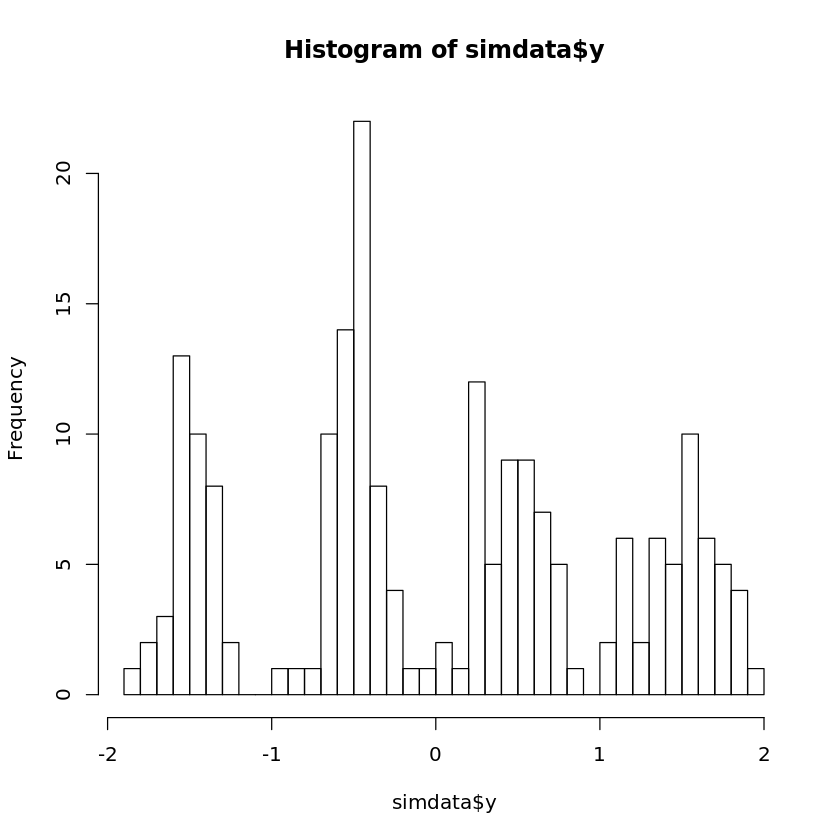

In [13]:
# Give the input file name to the function.
path_to_simdata = "../../data/sim-data/gmm-data-n200.json"
simdata = fromJSON(file=path_to_simdata)
hist(simdata$y, breaks=30)

In [14]:
set.seed(1)

data = list(y=simdata$y)
constants = list(N=length(data$y), K=10)
inits = list(mu=rnorm(constants$K, 0, 3),
             sig2=rep(0.1^2, constants$K),
             z=rep(1, constants$N),
             alpha=runif(1, 0.1, 0.2))

In [15]:
burn = 20000
nsamples = 1000
samples = nimbleMCMC(code=model.code, 
                     constants=constants, 
                     data=data, 
                     inits=inits,
                     monitors=c('mu', 'sig2', 'alpha', 'z'),
                     nburnin=burn, niter=burn + nsamples, progressBar=TRUE)

defining model...

building model...

setting data and initial values...

running calculate on model (any error reports that follow may simply reflect missing values in model variables) ... 


checking model sizes and dimensions...


checking model calculations...

model building finished.

Warning message in samplerFunction(model = model, mvSaved = mvSaved, target = target, :
“sampler_CRP: The number of cluster parameters is less than the number of potential clusters. The MCMC is not strictly valid if it ever proposes more components than cluster parameters exist; NIMBLE will warn you if this occurs.
”
compiling... this may take a minute. Use 'showCompilerOutput = TRUE' to see C++ compilation details.

compilation finished.

running chain 1...



|-------------|-------------|-------------|-------------|
|--CRP_sampler: This MCMC is not for a proper model. The MCMC attempted to use more components than the number of cluster parameters. Please increase the number of cluster parameters.
-----------------------------------------------------|


In [16]:
# set.seed(1)
# dp_crp_gmm = nimbleModel(model.code, constants, data, inits)
# Compile model
# compiled_dp_crp_gmm = compileNimble(dp_crp_gmm)
# chain = buildMCMC(compiled_dp_crp_gmm)
# compiled_dp_crp_gmm = compileNimble(chain, project= simModel)

In [17]:
# samples = runMCMC(compiled_dp_crp_gmm, nburnin=1000, niter=1000, setSeed=1)

In [18]:
colnames(samples)
dim(samples)

[1] "alpha"    "mu[1]"    "mu[2]"    "mu[3]"    "mu[4]"    "mu[5]"   
  [7] "mu[6]"    "mu[7]"    "mu[8]"    "mu[9]"    "mu[10]"   "sig2[1]" 
 [13] "sig2[2]"  "sig2[3]"  "sig2[4]"  "sig2[5]"  "sig2[6]"  "sig2[7]" 
 [19] "sig2[8]"  "sig2[9]"  "sig2[10]" "z[1]"     "z[2]"     "z[3]"    
 [25] "z[4]"     "z[5]"     "z[6]"     "z[7]"     "z[8]"     "z[9]"    
 [31] "z[10]"    "z[11]"    "z[12]"    "z[13]"    "z[14]"    "z[15]"   
 [37] "z[16]"    "z[17]"    "z[18]"    "z[19]"    "z[20]"    "z[21]"   
 [43] "z[22]"    "z[23]"    "z[24]"    "z[25]"    "z[26]"    "z[27]"   
 [49] "z[28]"    "z[29]"    "z[30]"    "z[31]"    "z[32]"    "z[33]"   
 [55] "z[34]"    "z[35]"    "z[36]"    "z[37]"    "z[38]"    "z[39]"   
 [61] "z[40]"    "z[41]"    "z[42]"    "z[43]"    "z[44]"    "z[45]"   
 [67] "z[46]"    "z[47]"    "z[48]"    "z[49]"    "z[50]"    "z[51]"   
 [73] "z[52]"    "z[53]"    "z[54]"    "z[55]"    "z[56]"    "z[57]"   
 [79] "z[58]"    "z[59]"    "z[60]"    "z[61]"    "z[62]"    "z[63]"   
 [85] "z[64]"    "z[65]"    "z[66]"    "z[67]"    "z[68]"    "z[69]"   
 [91] "z[70]"    "z[71]"    "z[72]"    "z[73]"    "z[74]"    "z[75]"   
 [97] "z[76]"    "z[77]"    "z[78]"    "z[79]"    "z[80]"    "z[81]"   
[103] "z[82]"    "z[83]"    "z[84]"    "z[85]"    "z[86]"    "z[87]"   
[109] "z[88]"    "z[89]"    "z[90]"    "z[91]"    "z[92]"    "z[93]"   
[115] "z[94]"    "z[95]"    "z[96]"    "z[97]"    "z[98]"    "z[99]"   
[121] "z[100]"   "z[101]"   "z[102]"   "z[103]"   "z[104]"   "z[105]"  
[127] "z[106]"   "z[107]"   "z[108]"   "z[109]"   "z[110]"   "z[111]"  
[133] "z[112]"   "z[113]"   "z[114]"   "z[115]"   "z[116]"   "z[117]"  
[139] "z[118]"   "z[119]"   "z[120]"   "z[121]"   "z[122]"   "z[123]"  
[145] "z[124]"   "z[125]"   "z[126]"   "z[127]"   "z[128]"   "z[129]"  
[151] "z[130]"   "z[131]"   "z[132]"   "z[133]"   "z[134]"   "z[135]"  
[157] "z[136]"   "z[137]"   "z[138]"   "z[139]"   "z[140]"   "z[141]"  
[163] "z[142]"   "z[143]"   "z[144]"   "z[145]"   "z[146]"   "z[147]"  
[169] "z[148]"   "z[149]"   "z[150]"   "z[151]"   "z[152]"   "z[153]"  
[175] "z[154]"   "z[155]"   "z[156]"   "z[157]"   "z[158]"   "z[159]"  
[181] "z[160]"   "z[161]"   "z[162]"   "z[163]"   "z[164]"   "z[165]"  
[187] "z[166]"   "z[167]"   "z[168]"   "z[169]"   "z[170]"   "z[171]"  
[193] "z[172]"   "z[173]"   "z[174]"   "z[175]"   "z[176]"   "z[177]"  
[199] "z[178]"   "z[179]"   "z[180]"   "z[181]"   "z[182]"   "z[183]"  
[205] "z[184]"   "z[185]"   "z[186]"   "z[187]"   "z[188]"   "z[189]"  
[211] "z[190]"   "z[191]"   "z[192]"   "z[193]"   "z[194]"   "z[195]"  
[217] "z[196]"   "z[197]"   "z[198]"   "z[199]"   "z[200]"

[1] 1000  221

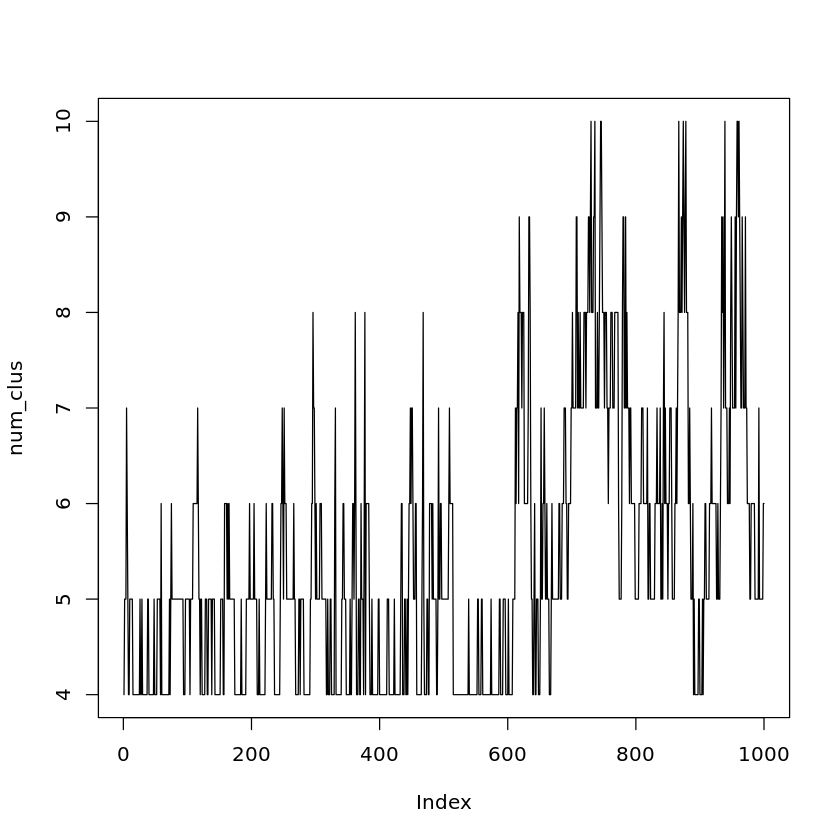

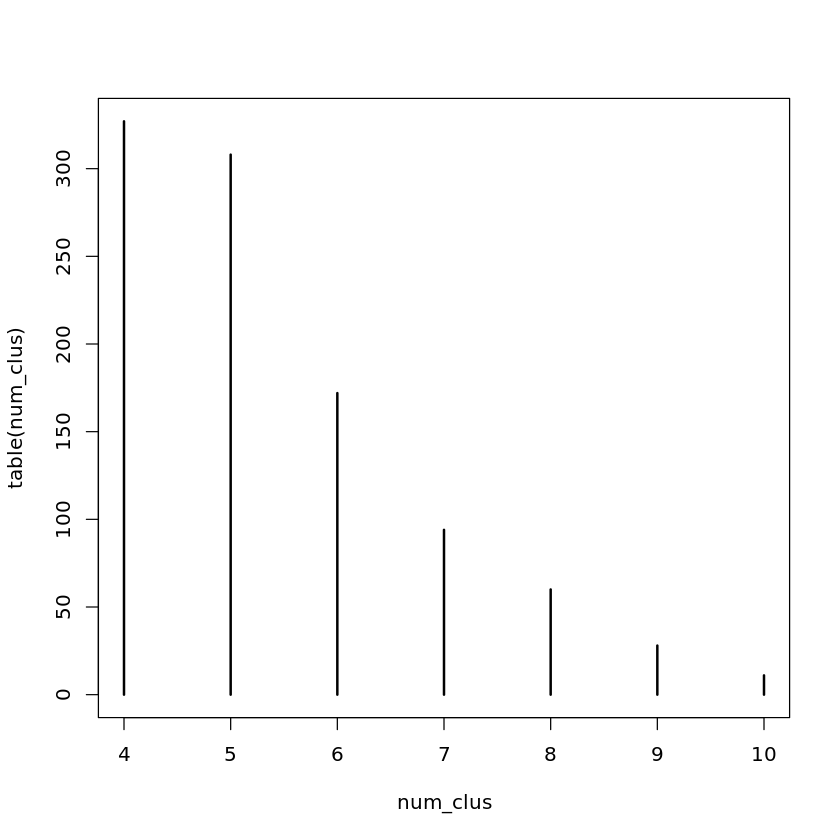

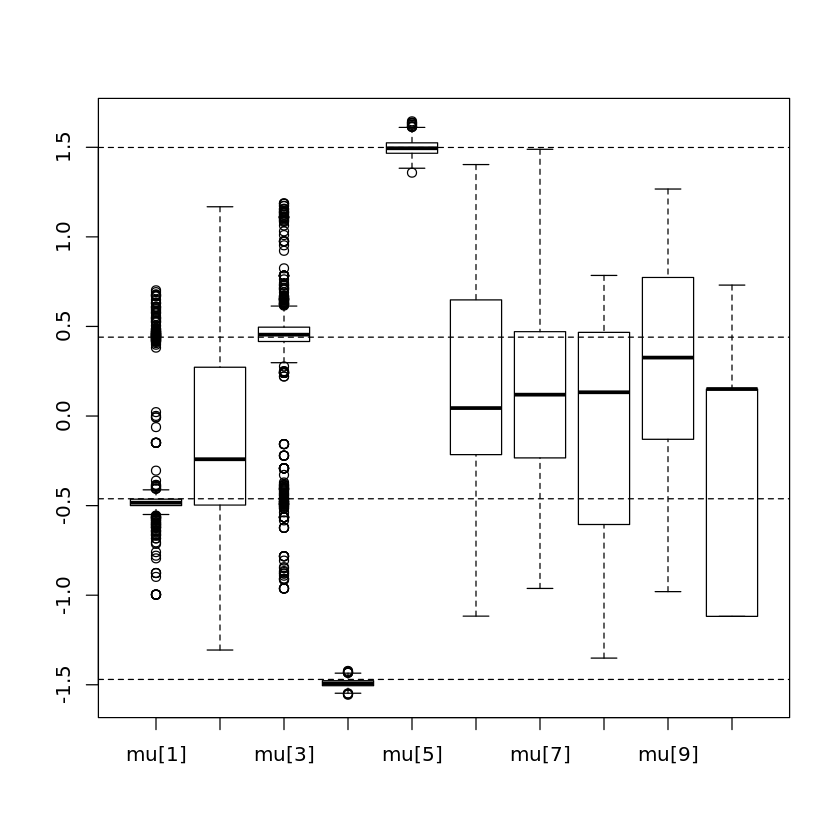

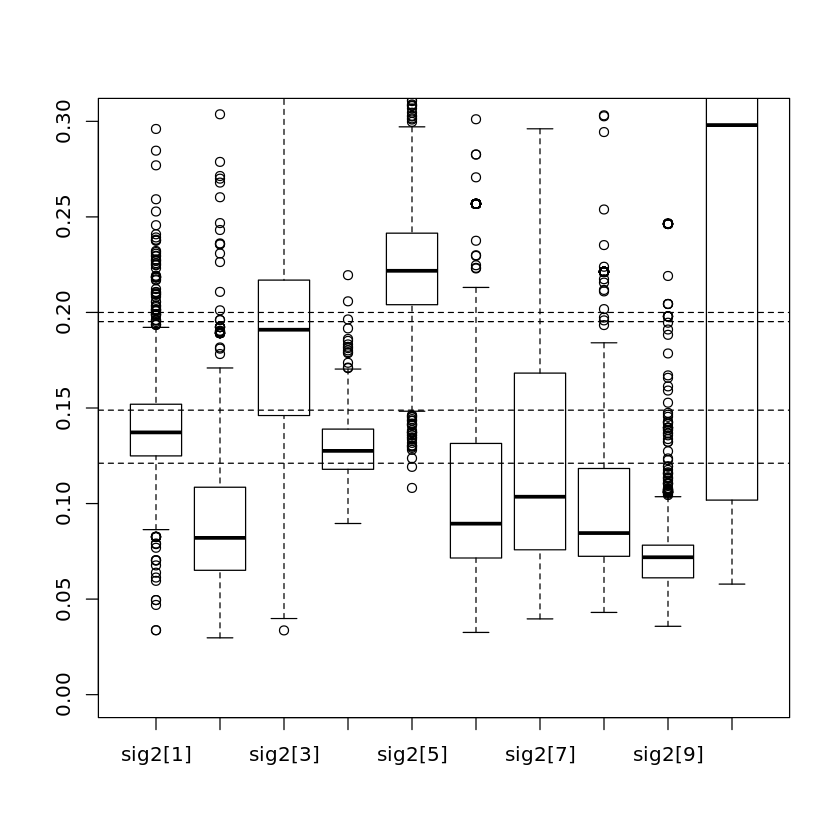

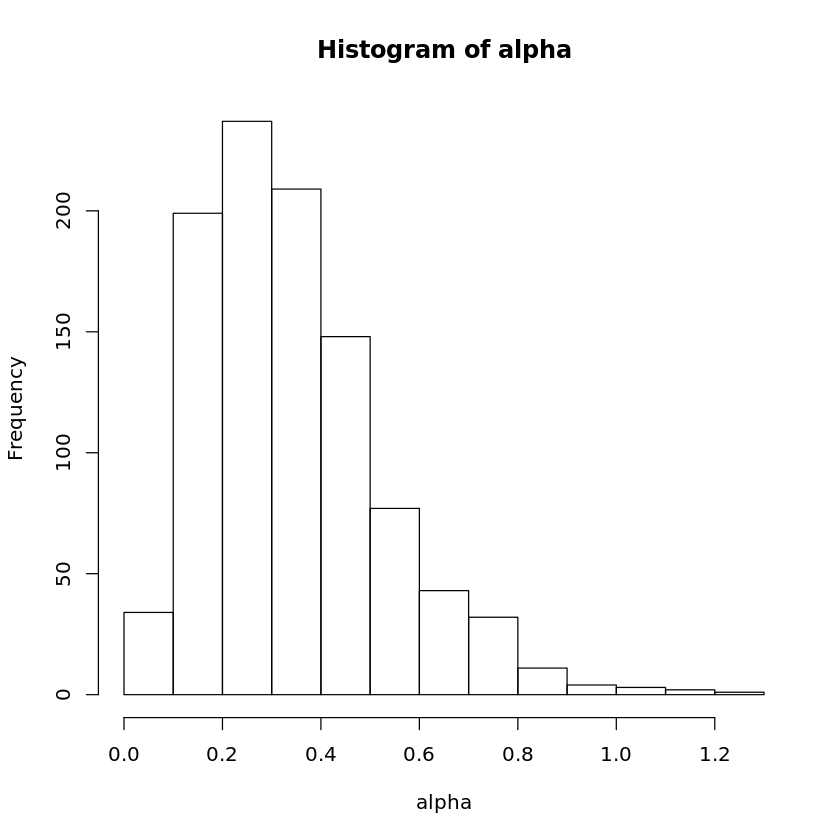

In [19]:
N = constants$N
mu = samples[, 2:11]
sig2 = samples[, 12:21]
alpha = samples[, 'alpha']
z = samples[, 22:(22+N-1)]

num_clus = apply(z, 1, function(row) length(unique(row)))
plot(num_clus, type='l')
plot(table(num_clus))

boxplot(mu)
abline(h=simdata$mu, lty=2)

boxplot(sqrt(sig2), ylim=c(0, 0.3))
abline(h=simdata$sig, lty=2)

hist(alpha)